In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
np.random.seed(101)

In [10]:
df = pd.read_csv('tae.data', header=None)

In [11]:
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [12]:
columns = ['English speaker', 'Course instructor', 'Course', 'Summer or regular semester', 'Class size', 'Class attribute']

In [13]:
df.columns = columns

In [14]:
df.head()

,English speaker,Course instructor,Course,Summer or regular semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
English speaker               151 non-null int64
Course instructor             151 non-null int64
Course                        151 non-null int64
Summer or regular semester    151 non-null int64
Class size                    151 non-null int64
Class attribute               151 non-null int64
dtypes: int64(6)
memory usage: 7.1 KB


In [16]:
x = df.drop('Class attribute', axis=1).values
labels = df['Class attribute']
y = pd.get_dummies(df['Class attribute']).values

In [17]:
x.shape

(151L, 5L)

In [18]:
num_inputs = 5
neurons1 = 50
neurons2 = 20
num_outputs = 3

In [19]:
W1 = np.random.randn(num_inputs,neurons1)*0.01
b1 = np.zeros(neurons1)

W2 = np.random.randn(neurons1,neurons2)*0.01
b2 = np.zeros(neurons2)

W3 = np.random.randn(neurons2,num_outputs)*0.01
b3 = np.zeros(num_outputs)

In [20]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def sigmoid_der(x):
#     return x * (1 - x)

In [21]:
def sigmoid(x):  
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid(x))

# def softmax(A):  
#     expA = np.exp(A)
#     return expA / expA.sum(axis=1, keepdims=True)

In [22]:
lr = 0.01
error_tab = []
lr_tab = []
acc_tab = []
epochs = 10000

In [23]:
for epoch in range(10000):
    
    ########## Forward Propagation
    
    # Layer 1
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # Layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    # Layer 3
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    
    ########## Back Propagation
    
    ########## Layer 3
    delta3 = a3-y
    dW3 = np.dot(a2.T, delta3)
    
    db3 = delta3
    
    ########## Layer 2
    delta2 = np.dot(delta3, W3.T) * sigmoid_der(z2)
    dW2 = np.dot(a1.T, delta2)
    
    db2 = delta2
    
    ########## Layer 1
    delta1 = np.dot(delta2, W2.T) * sigmoid_der(z1)
    dW1 = np.dot(x.T, delta1)
    
    db1 = delta1
    
    ########## Adaptive learning rate
    lr = lr * 1/(1 + lr/epochs * epoch)
    
    # Update Weights ================
    W1 -= lr * dW1
    b1 -= lr * db1.sum(axis=0)

    W2 -= lr * dW2
    b2 -= lr * db2.sum(axis=0)
    
    W3 -= lr * dW3
    b3 -= lr * db3.sum(axis=0)
    
    if epoch % 200 == 0:
        loss = -np.sum(y * np.log(a3))
        error_tab.append(loss)
        lr_tab.append(lr)
        equals = np.equal(np.argmax(y, axis=1), np.argmax(a3, axis=1))
        acc = np.mean(equals)
        acc_tab.append(acc)
        print('Epoch: {}, Loss: {}, Accuracy: {}'.format(epoch, loss, acc))

Epoch: 0, Loss: 103.910168746, Accuracy: 0.344370860927
Epoch: 200, Loss: 157.011247768, Accuracy: 0.397350993377
Epoch: 400, Loss: 154.371526893, Accuracy: 0.450331125828
Epoch: 600, Loss: 141.107012458, Accuracy: 0.53642384106
Epoch: 800, Loss: 136.187588761, Accuracy: 0.53642384106
Epoch: 1000, Loss: 133.074163753, Accuracy: 0.503311258278
Epoch: 1200, Loss: 132.181811577, Accuracy: 0.476821192053
Epoch: 1400, Loss: 115.91541417, Accuracy: 0.629139072848
Epoch: 1600, Loss: 109.073111191, Accuracy: 0.682119205298
Epoch: 1800, Loss: 103.291533248, Accuracy: 0.688741721854
Epoch: 2000, Loss: 100.377674013, Accuracy: 0.701986754967
Epoch: 2200, Loss: 95.5211943239, Accuracy: 0.754966887417
Epoch: 2400, Loss: 102.42469758, Accuracy: 0.675496688742
Epoch: 2600, Loss: 83.3666148056, Accuracy: 0.76821192053
Epoch: 2800, Loss: 76.7960448531, Accuracy: 0.748344370861
Epoch: 3000, Loss: 77.6617642738, Accuracy: 0.801324503311
Epoch: 3200, Loss: 72.3250124677, Accuracy: 0.761589403974
Epoch: 34

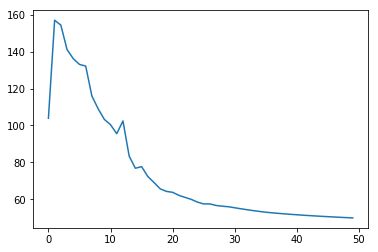

In [24]:
plt.plot(range(len(error_tab)), error_tab)

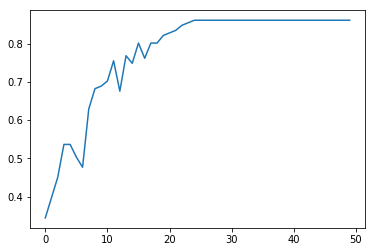

In [25]:
plt.plot(range(len(acc_tab)), acc_tab)

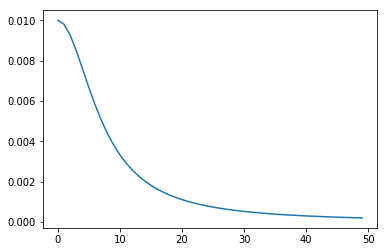

In [26]:
plt.plot(range(len(lr_tab)), lr_tab)